> This is the query that returned the data used below

> https://uk-air.defra.gov.uk/data/data_selector_service?q=2053669#mid

In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.options.display.max_columns = 50
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.simplefilter(action='ignore', category=Warning)


## Import and cleaning

In [152]:
path = '/Users/aidanair/Documents/covid/wales_air_1204/defra_cardiff_air_1204.csv'
predf = pd.read_csv (path, skiprows = 3, header = [0, 1])


In [252]:
predf.iloc[:2, ]

,Unnamed: 0_level_0,Unnamed: 1_level_0,Cardiff Centre,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,Unnamed: 12_level_0,Unnamed: 13_level_0,Unnamed: 14_level_0,Unnamed: 15_level_0,Unnamed: 16_level_0,Unnamed: 17_level_0,Unnamed: 18_level_0,Unnamed: 19_level_0,Unnamed: 20_level_0,Unnamed: 21_level_0,Unnamed: 22_level_0,Unnamed: 23_level_0,Unnamed: 24_level_0,Unnamed: 25_level_0,Unnamed: 26_level_0,Unnamed: 27_level_0,Unnamed: 28_level_0,Unnamed: 29_level_0,Unnamed: 30_level_0,Unnamed: 31_level_0,Cardiff Newport Road,Unnamed: 33_level_0,Unnamed: 34_level_0,Unnamed: 35_level_0,Unnamed: 36_level_0,Unnamed: 37_level_0,Unnamed: 38_level_0,Unnamed: 39_level_0,Unnamed: 40_level_0,Unnamed: 41_level_0,Unnamed: 42_level_0,Unnamed: 43_level_0,Unnamed: 44_level_0,Unnamed: 45_level_0
,Date,Time,Ozone,Status,Nitric oxide,Status,Nitrogen dioxide,Status,Nitrogen oxides as nitrogen dioxide,Status,Sulphur dioxide,Status,Carbon monoxide,Status,PM10 particulate matter (Hourly measured),Status,Non-volatile PM10 (Hourly measured),Status,Volatile PM10 (Hourly measured),Status,PM2.5 particulate matter (Hourly measured),Status,Non-volatile PM2.5 (Hourly measured),Status,Volatile PM2.5 (Hourly measured),Status,Modelled Wind Direction,Status,Modelled Wind Speed,Status,Modelled Temperature,Status,Nitric oxide,Status,Nitrogen dioxide,Status,Nitrogen oxides as nitrogen dioxide,Status,PM10 particulate matter (Hourly measured),Status,Modelled Wind Direction,Status,Modelled Wind Speed,Status,Modelled Temperature,Status
0,2019-04-01,01:00:00,66.58986,V ugm-3,0.18047,V ugm-3,5.81632,V ugm-3,6.09304,V ugm-3,0.73637,V ugm-3,0.087,V mgm-3,13.8,V ugm-3 (TEOM FDMS),11.5,V ugm-3 (TEOM FDMS),2.3,V ugm-3 (TEOM FDMS),3.2,V ugm-3 (TEOM FDMS),2.2,V ugm-3 (TEOM FDMS),1,V ugm-3 (TEOM FDMS),77.2,N deg,5.8,N ms-1,4.8,N degC,1.86267,V ugm-3,12.33341,V ugm-3,15.18945,V ugm-3,No data,V ugm-3 (Ref.eq),78.5,N deg,7.6,N ms-1,6.9,N degC
1,2019-04-01,02:00:00,63.52978,V ugm-3,0.49629,V ugm-3,14.02662,V ugm-3,14.78759,V ugm-3,0.63117,V ugm-3,0.068215,V mgm-3,14.1,V ugm-3 (TEOM FDMS),11.2,V ugm-3 (TEOM FDMS),2.9,V ugm-3 (TEOM FDMS),4.1,V ugm-3 (TEOM FDMS),2.2,V ugm-3 (TEOM FDMS),1.9,V ugm-3 (TEOM FDMS),74.6,N deg,5.6,N ms-1,4.3,N degC,1.2129,V ugm-3,12.04131,V ugm-3,13.90106,V ugm-3,No data,V ugm-3 (Ref.eq),74.8,N deg,7.3,N ms-1,6.4,N degC


In [253]:
# create df for cardiff centre and newport road for NO2
df = predf.iloc[:, np.r_[0:2, 6:8, 34:36]]


In [254]:
# remove the top layer of the multi-index
df.columns = df.columns.droplevel(level = 0)

# drop the bottom row
df = df.drop(df.index[[9048]])


In [256]:
# clean time column to have 00 instead of 24
df['Time'] = df['Time'].str.replace('24', '00')

# create new col with date AND time
df['date_time'] = df['Date'] + ' ' + df['Time']

# convert to datetime
df.date_time = pd.to_datetime(df.date_time)

# drop the old date col
df = df.iloc[:,1:]

In [258]:
cols = ['time', 'cardiff_NO2', 'cardiff_status', 'NR_NO2', 'NR_status', 'date_time']

df.columns = cols

In [260]:
# cast two columns to numeric

df.cardiff_NO2 = pd.to_numeric(df.cardiff_NO2, errors = 'coerce')
df.NR_NO2 = pd.to_numeric(df.NR_NO2, errors = 'coerce')


In [262]:
# set the datetime as the index

df.set_index(df.date_time, inplace = True)

In [266]:
print(df.shape)
df[:2]

# we have NO2 readings in two locations, every hour. 24 readings for each of 377 days (april 1 2019 - april 11 2020)

(9048, 6)


,time,cardiff_NO2,cardiff_status,NR_NO2,NR_status,date_time
date_time,,,,,,
2019-04-01 01:00:00,01:00:00,5.81632,V ugm-3,12.33341,V ugm-3,2019-04-01 01:00:00
2019-04-01 02:00:00,02:00:00,14.02662,V ugm-3,12.04131,V ugm-3,2019-04-01 02:00:00


## Analysis central Cardiff

In [274]:
# groupby for an average hourly reading over the year to see the 24hour period

cardiff_daily = pd.DataFrame(df.groupby('time')['cardiff_NO2'].mean())
print (len(cardiff_daily))
cardiff_daily[:2]

24


,cardiff_NO2
time,
00:00:00,16.527019
01:00:00,15.518936


#### CHECK 
> calculate the average we think we're looking at in the groupby to doublecheck

In [273]:
testing = df[df.time == '01:00:00']
print (len(testing))                   # this returns 377 rows, one for each day, of 1am readings.
print(testing.cardiff_NO2.mean())      # this returns the same figure as our grouby.

377
15.518935652173912


In [278]:
# filter for the last week (2020), get 24 readings having averaged each of the hour categories - cast to list

CD_wk_1104_2020 = list(df['2020-04-04':'2020-04-11'].groupby('time')['cardiff_NO2'].mean())

# filter for the same week, in 2019

CD_wk_1104_2019 = list(df['2019-04-04':'2019-04-11'].groupby('time')['cardiff_NO2'].mean())


In [279]:
# add these averaged lists as columns

cardiff_daily['wk_to1104_2020'] = CD_wk_1104_2020
cardiff_daily['wk_to1104_2019'] = CD_wk_1104_2019

In [280]:
cardiff_daily[:2]

,cardiff_NO2,wk_to1104_2020,wk_to1104_2019
time,,,
00:00:00,16.527019,21.061406,14.591075
01:00:00,15.518936,18.718594,10.330335


#### CHECK

In [346]:
# make a selection, then filter, then find the mean to check the groupby is returning what we think it's returning.

print(df['2020-04-04':'2020-04-11'][df.time == '01:00:00'].cardiff_NO2.mean())

print(df['2019-04-04':'2019-04-11'][df.time == '01:00:00'].cardiff_NO2.mean())


18.71859375
10.330335


In [290]:
cardiff_daily[:2]

,cardiff_NO2,wk_to1104_2020,wk_to1104_2019
time,,,
00:00:00,16.527019,21.061406,14.591075
01:00:00,15.518936,18.718594,10.330335


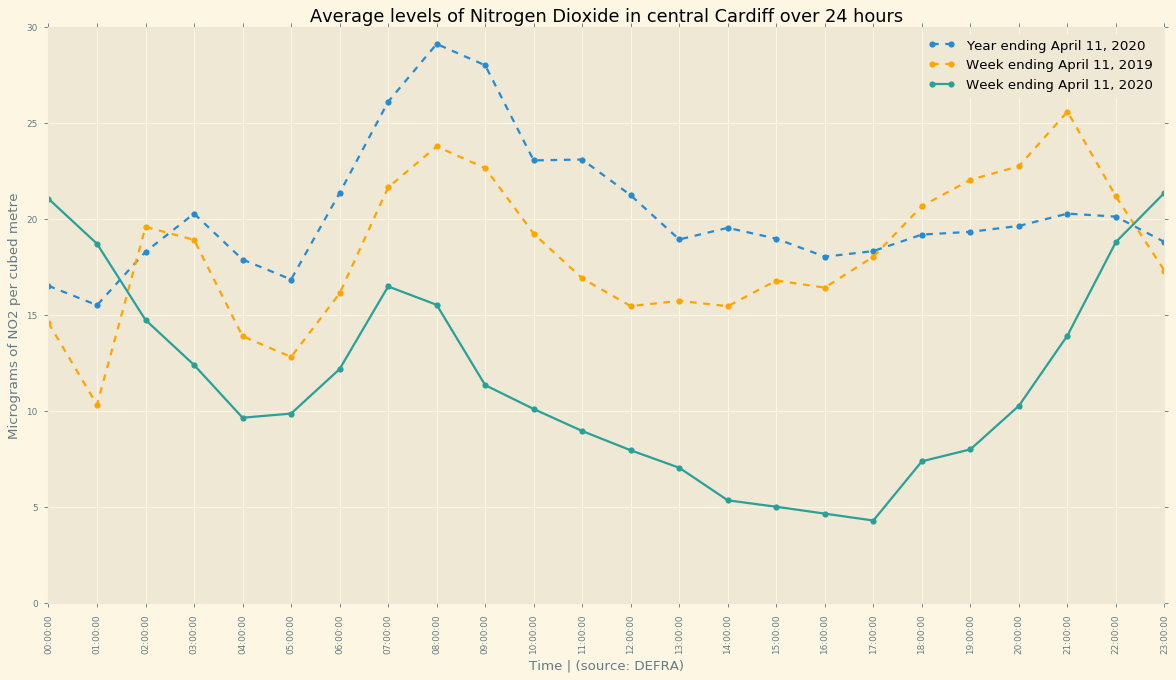

In [385]:
plt.style.use('Solarize_Light2')

fig, ax = plt.subplots(figsize = (18, 9))

plt.plot(cardiff_daily.index, cardiff_daily.cardiff_NO2, linestyle = "--", label = 'Year ending April 11, 2020', marker = 'o')
plt.plot(cardiff_daily.index, cardiff_daily.wk_to1104_2019, linestyle = "--", color = 'orange', label = 'Week ending April 11, 2019', marker = 'o')
plt.plot(cardiff_daily.index, cardiff_daily.wk_to1104_2020, label = 'Week ending April 11, 2020', marker = 'o')

#plt.legend(loc = 'best')
plt.legend(loc = 1, prop={'size': 12})

ax.set_title('Average levels of Nitrogen Dioxide in central Cardiff over 24 hours')

ax.set_ylim(bottom = 0)
ax.set_xlabel('Time | (source: DEFRA)')
ax.set_ylabel('Micrograms of NO2 per cubed metre')
plt.xticks(rotation = 'vertical')
plt.show()

In [368]:
print ('average NO2 for YEAR ending April 11, 2020:', cardiff_daily.cardiff_NO2.mean().round(2), "micrograms")
print ('average NO2 for week ending April 11, 2019:', cardiff_daily.wk_to1104_2019.mean().round(2), "micrograms")
print ('average NO2 for week ending April 11, 2020:', cardiff_daily.wk_to1104_2020.mean().round(2), "micrograms")


average NO2 for YEAR ending April 11, 2020: 20.36 micrograms
average NO2 for week ending April 11, 2019: 18.25 micrograms
average NO2 for week ending April 11, 2020: 11.47 micrograms


## Analysis Cardiff (Newport road, NR)

In [348]:
df[:2]

,time,cardiff_NO2,cardiff_status,NR_NO2,NR_status,date_time
date_time,,,,,,
2019-04-01 01:00:00,01:00:00,5.82,V ugm-3,12.33,V ugm-3,2019-04-01 01:00:00
2019-04-01 02:00:00,02:00:00,14.03,V ugm-3,12.04,V ugm-3,2019-04-01 02:00:00


In [349]:
# run a groupby to get an hourly average

NR_daily = pd.DataFrame(df.groupby('time')['NR_NO2'].mean())

In [386]:
print (len(NR_daily))

NR_daily[:3]

24


,NR_NO2,wk_to1104_2020,wk_to1104_2019
time,,,
00:00:00,23.04,25.03,34.02
01:00:00,19.47,20.65,24.36
02:00:00,16.45,17.88,18.97


#### CHECK

In [351]:
testing = df[df.time == '01:00:00']   # filter the original df to get only rows at 1am
print (len(testing))                  # this returns 377 rows, one for each day, of 1am readings.
print(testing.NR_NO2.mean())          # this returns the same figure as our grouby.


377
19.465428930481284


In [353]:

# filter for the last week (2020), get 24 readings having averaged each of the hour categories - cast to list
NR_wk_1104_2020 = list(df['2020-04-04':'2020-04-11'].groupby('time')['NR_NO2'].mean())

# filter for the same week, in 2019
NR_wk_1104_2019 = list(df['2019-04-04':'2019-04-11'].groupby('time')['NR_NO2'].mean())

# add these averaged lists as columns
NR_daily['wk_to1104_2020'] = NR_wk_1104_2020
NR_daily['wk_to1104_2019'] = NR_wk_1104_2019


In [354]:
NR_daily[:2]

,NR_NO2,wk_to1104_2020,wk_to1104_2019
time,,,
00:00:00,23.04,25.03,34.02
01:00:00,19.47,20.65,24.36


#### CHECK

In [355]:
# make a selection, then filter, then find the mean to check the groupby is returning what we think it's returning.

print(df['2020-04-04':'2020-04-11'][df.time == '01:00:00'].NR_NO2.mean())
print(df['2019-04-04':'2019-04-11'][df.time == '01:00:00'].NR_NO2.mean())

20.655
24.357145714285714


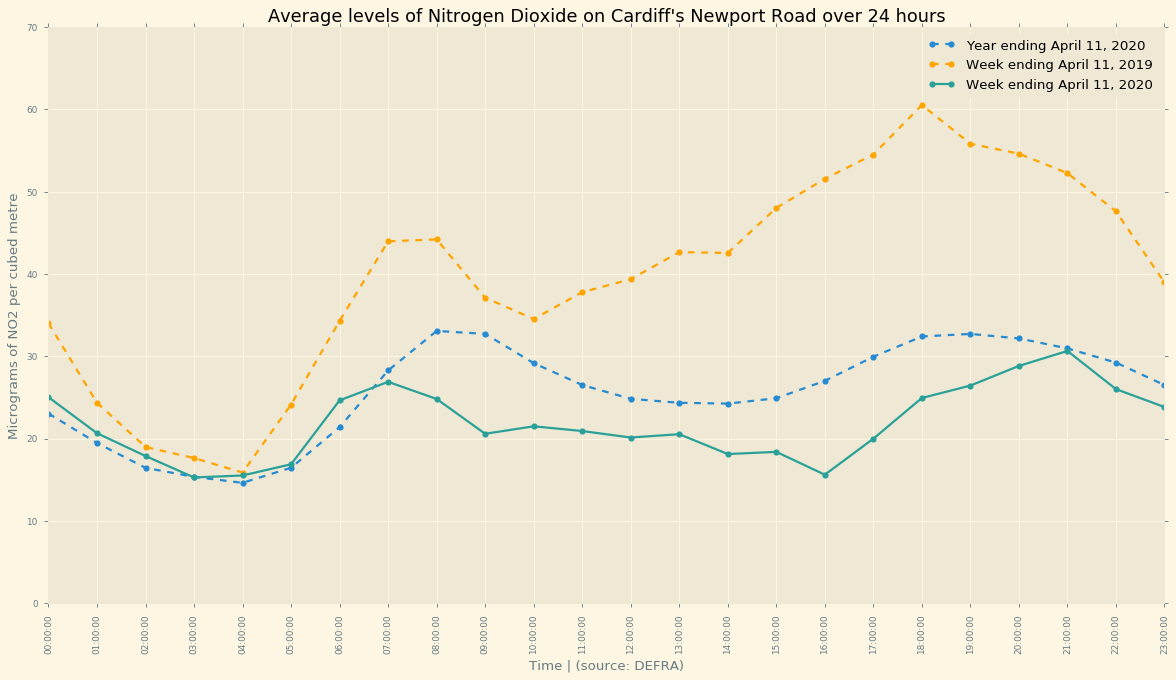

In [387]:
plt.style.use('Solarize_Light2')

fig, ax = plt.subplots(figsize = (18, 9))

plt.plot(NR_daily.index, NR_daily.NR_NO2, linestyle = "--", label = 'Year ending April 11, 2020', marker = 'o')
plt.plot(NR_daily.index, NR_daily.wk_to1104_2019, linestyle = "--", color = 'orange', label = 'Week ending April 11, 2019', marker = 'o')
plt.plot(NR_daily.index, NR_daily.wk_to1104_2020, label = 'Week ending April 11, 2020', marker = 'o')

# plt.legend(loc = 'best')
plt.legend(loc = 1, prop={'size': 12})

ax.set_title('Average levels of Nitrogen Dioxide on Cardiff\'s Newport Road over 24 hours')

ax.set_ylim(bottom=0)
ax.set_xlabel('Time | (source: DEFRA)')
ax.set_ylabel('Micrograms of NO2 per cubed metre')
plt.xticks(rotation = 'vertical')
plt.show()

In [362]:
NR_daily[:2]

,NR_NO2,wk_to1104_2020,wk_to1104_2019
time,,,
00:00:00,23.04,25.03,34.02
01:00:00,19.47,20.65,24.36


In [367]:
print ('NR - average NO2 for YEAR ending April 11, 2020:', NR_daily.NR_NO2.mean().round(2), "micrograms")
print ('NR - average NO2 for week ending April 11, 2019:', NR_daily.wk_to1104_2019.mean().round(2), "micrograms")
print ('NR - average NO2 for week ending April 11, 2020:', NR_daily.wk_to1104_2020.mean().round(2), "micrograms")


NR - average NO2 for YEAR ending April 11, 2020: 25.66 micrograms
NR - average NO2 for week ending April 11, 2019: 39.81 micrograms
NR - average NO2 for week ending April 11, 2020: 21.84 micrograms


# Reference

In [330]:
# an import of NO2 data since April 2016 allows for resampling by week. No week - on average dips below 12.

filename = '01042016_11042020_NO2_cdf_NR'
path = f'/Users/aidanair/Documents/covid/wales_air_1204/{filename}.csv'
old = pd.read_csv (path, skiprows = 3, header = [0, 1])
old.columns = old.columns.droplevel(level = 0)
old = old.iloc[:35328]
old['Time'] = old['Time'].str.replace('24', '00')
old['date_time'] = old['Date'] + ' ' + old['Time']
old['Time'] = old['Time'].str.replace('24', '00')
old['date_time'] = old['Date'] + ' ' + old['Time']
old.date_time = pd.to_datetime(old.date_time)
old = old.iloc[:,1:]
cols = ['time', 'cardiff_NO2', 'cardiff_status', 'NR_NO2', 'NR_status', 'date_time']
old.columns = cols
old.cardiff_NO2 = pd.to_numeric(old.cardiff_NO2, errors = 'coerce')
old.NR_NO2 = pd.to_numeric(old.NR_NO2, errors = 'coerce')
old.set_index(old.date_time, inplace = True)